## **Aplicações Práticas do PCA**

Aplicações Práticas do PCA será ampliado para incluir exemplos práticos e códigos em Python que demonstram cada subtema de maneira clara e detalhada.

In [17]:
# Importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data

# Importar datasets do scikit-learn
from sklearn.datasets import load_wine, load_digits

# Importar módulos de machine learning
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

### Redução de Dimensionalidade para Visualização

**Reduzindo as dimensões de um dataset com alta dimensionalidade.** Usaremos o dataset **Digits** (8x8 imagens) do scikit-learn.

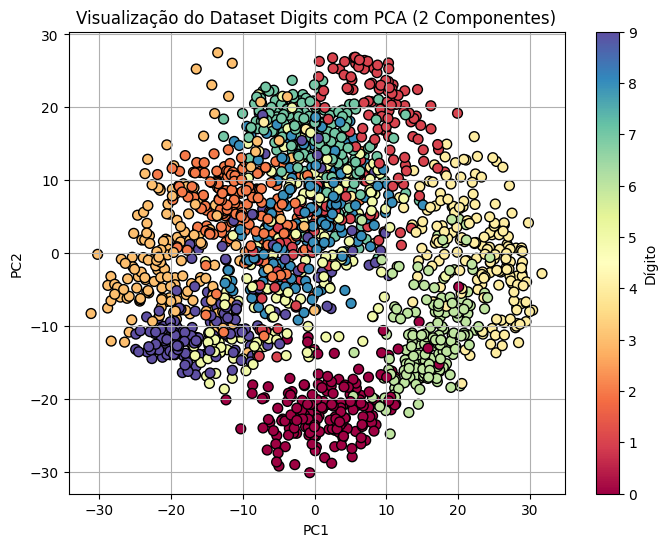

In [18]:
# Carregar o dataset Digits
digits = load_digits()
X, y = digits.data, digits.target

# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
digits_projected = pca.fit_transform(X)

# Visualizar os dígitos no espaço reduzido
plt.figure(figsize=(8, 6))
plt.scatter(digits_projected[:, 0], digits_projected[:, 1], c=y, cmap='Spectral', s=50, edgecolor='k')
plt.colorbar(label='Dígito')
plt.title("Visualização do Dataset Digits com PCA (2 Componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

## Compressão de Dados

**Compressão de uma imagem usando PCA.** Utilizaremos uma imagem em tons de cinza para demonstrar.

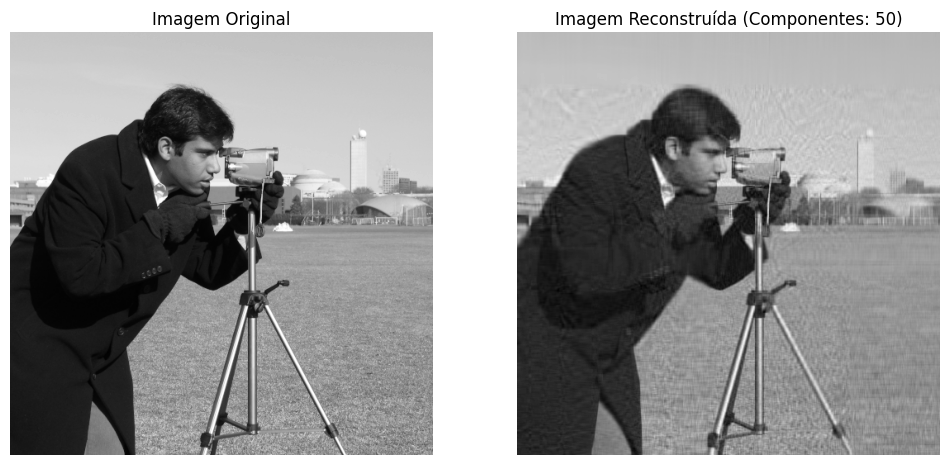

In [19]:
# Carregar a imagem em tons de cinza
image = data.camera()
original_shape = image.shape

# Normalizar os valores da imagem
image_scaled = image / 255.0

# Aplicar PCA para compressão
n_components = 50
pca = PCA(n_components=n_components)
compressed = pca.fit_transform(image_scaled)

# Reconstruir a imagem a partir dos componentes principais
reconstructed = pca.inverse_transform(compressed)

# Visualizar a imagem original e reconstruída
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(image_scaled, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Imagem Reconstruída (Componentes: {n_components})")
plt.imshow(reconstructed, cmap='gray')
plt.axis('off')
plt.show()

## Pré-processamento para Modelos de Machine Learning

**Melhorando a performance com PCA antes de uma SVM.** Usaremos o dataset **Wine** para esta demonstração.

In [20]:
# Carregar o dataset Wine
wine = load_wine()
X, y = wine.data, wine.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar PCA antes de treinar o modelo
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar uma SVM com os dados reduzidos
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_pca, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia com PCA: {accuracy:.2f}")

Acurácia com PCA: 0.72


## Identificação de Outliers

**Detectando outliers em dados projetados com PCA.** Usaremos o dataset **Boston Housing**.

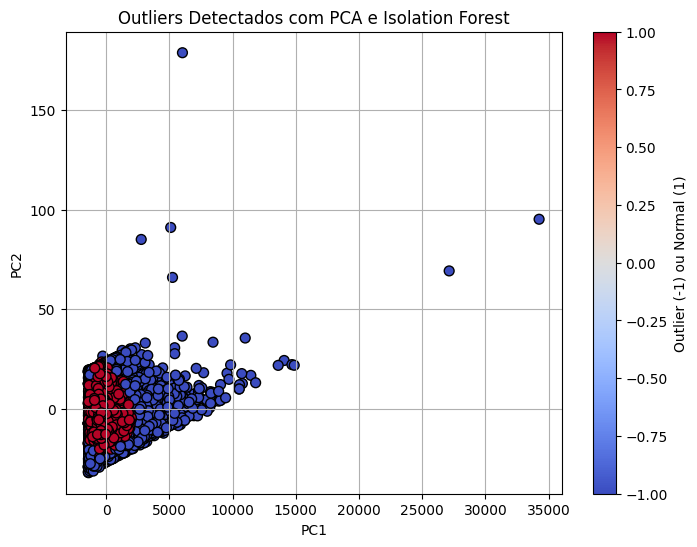

In [21]:
from sklearn.datasets import fetch_california_housing

boston = fetch_california_housing()
X, y = boston.data, boston.target

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar Isolation Forest para detectar outliers
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = isolation_forest.fit_predict(X_pca)

# Visualizar os outliers no espaço reduzido
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers, cmap='coolwarm', s=50, edgecolor='k')
plt.title("Outliers Detectados com PCA e Isolation Forest")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Outlier (-1) ou Normal (1)")
plt.grid()
plt.show()

## Detecção de Padrões

**Identificando padrões em um dataset de sinais.** Usaremos um dataset sintético de séries temporais.

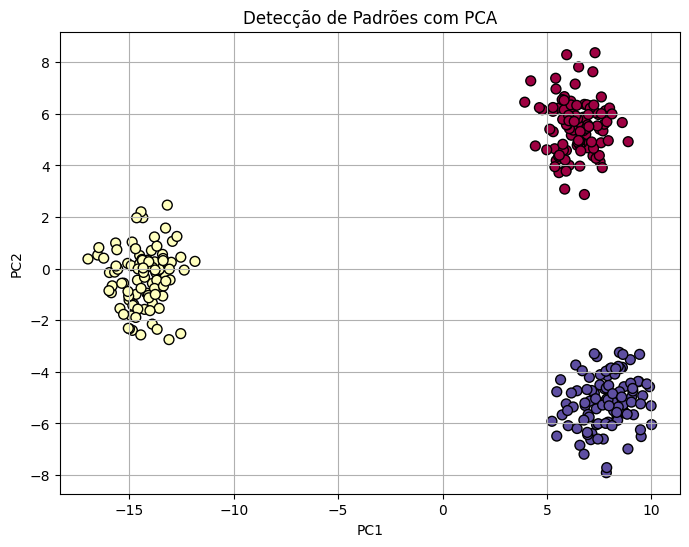

In [22]:
from sklearn.datasets import make_blobs

# Criar um dataset sintético
X, y = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar os padrões no espaço reduzido
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', s=50, edgecolor='k')
plt.title("Detecção de Padrões com PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

## Aplicações em Análise de Sentimentos

**Reduzindo dimensões de embeddings de texto.** Usaremos embeddings gerados por TF-IDF para PCA.

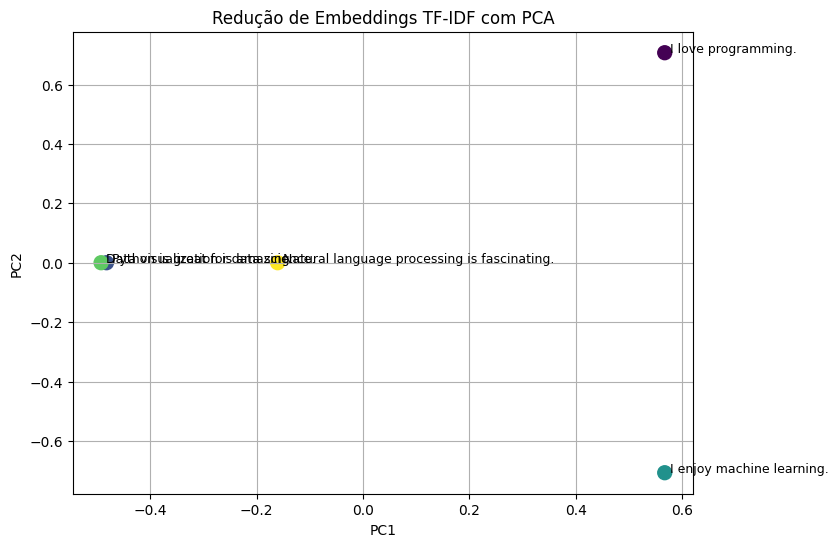

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criar um corpus simples
corpus = [
    "I love programming.",
    "Python is great for data science.",
    "I enjoy machine learning.",
    "Data visualization is amazing.",
    "Natural language processing is fascinating."
]

# Gerar embeddings TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus).toarray()

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_tfidf_pca = pca.fit_transform(X_tfidf)

# Visualizar os embeddings reduzidos
plt.figure(figsize=(8, 6))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=range(len(corpus)), cmap='viridis', s=100)
for i, text in enumerate(corpus):
    plt.text(X_tfidf_pca[i, 0] + 0.01, X_tfidf_pca[i, 1], text, fontsize=9)
plt.title("Redução de Embeddings TF-IDF com PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

---

### **Resumo**

- **5.1**: Reduzimos dimensões para facilitar a visualização.
- **5.2**: Mostramos como usar PCA para compressão de dados, reduzindo espaço de armazenamento.
- **5.3**: Integramos PCA com SVM para melhorar a performance de modelos de ML.
- **5.4**: Detectamos outliers com PCA combinado a Isolation Forest.
- **5.5**: Identificamos padrões em datasets complexos.
- **5.6**: Aplicamos PCA para reduzir embeddings de texto e facilitar análises semânticas.